In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# import different libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns
%matplotlib inline

In [3]:
new_df = pd.read_csv('final_dataset3.csv')
new_df = new_df.drop(['Unnamed: 0', 'Organization Name URL', ], axis=1)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66721 entries, 0 to 66720
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Organization Name                       66720 non-null  object
 1   CB Rank (Company)                       66721 non-null  object
 2   Headquarters Regions                    66721 non-null  object
 3   Category Groups                         66721 non-null  object
 4   Number of Founders                      66721 non-null  object
 5   Founders                                66721 non-null  object
 6   Number of Employees                     58894 non-null  object
 7   Number of Funding Rounds                66721 non-null  object
 8   Last Funding Type                       66721 non-null  object
 9   Total Funding Amount                    66719 non-null  object
 10  Total Funding Amount Currency           66721 non-null  object
 11  To

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,9,11,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
new_df = new_df.drop_duplicates(subset=['Organization Name'])
new_df.shape

(66152, 17)

In [5]:
new_df = new_df[new_df['Group Gender'].notnull()]
new_df.shape

(29501, 17)

In [6]:
new_df = new_df.reset_index()
new_df = new_df.drop(['index'], axis=1)

In [7]:
new_df['Number of Funding Rounds'] = new_df['Number of Funding Rounds'].astype(float)
new_df['Number of Founders'] = new_df['Number of Founders'].astype(float)
new_df['Total Funding Amount Currency (in USD)'] = new_df['Total Funding Amount Currency (in USD)'].astype(float)
new_df['Total Funding Amount'] = new_df['Total Funding Amount'].astype(float)


In [8]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29501 entries, 0 to 29500
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Organization Name                       29501 non-null  object 
 1   CB Rank (Company)                       29501 non-null  object 
 2   Headquarters Regions                    29501 non-null  object 
 3   Category Groups                         29501 non-null  object 
 4   Number of Founders                      29501 non-null  float64
 5   Founders                                29501 non-null  object 
 6   Number of Employees                     27145 non-null  object 
 7   Number of Funding Rounds                29501 non-null  float64
 8   Last Funding Type                       29501 non-null  object 
 9   Total Funding Amount                    29501 non-null  float64
 10  Total Funding Amount Currency           29501 non-null  ob

In [9]:
new_df.head()

,Organization Name,CB Rank (Company),Headquarters Regions,Category Groups,Number of Founders,Founders,Number of Employees,Number of Funding Rounds,Last Funding Type,Total Funding Amount,Total Funding Amount Currency,Total Funding Amount Currency (in USD),Organization,Names,Group Gender,Genders,Job Titles
0,Baetes,"80,003","European Union (EU), Nordic Countries, Scandin...","Clothing and Apparel, Commerce and Shopping, D...",3.0,"Erik Sjoberg, Filip Waak, Fredrik Heiding",NaN,1.0,Convertible Note,32000.0,EUR,39572.0,Baetes,"['Erik Sjoberg', 'Erik Sjoberg']",Male only,"['Male', 'Male']","['Founder & CEO', 'Founder & CEO']"
1,Rendy.io,"80,009",Latin America,"Commerce and Shopping, Hardware, Sales and Mar...",2.0,"Gerardo Mora, Israel Medina",1-10,2.0,Seed,100000.0,USD,100000.0,Rendy.io,"['Israel Medina', 'Israel Medina']",Male only,"['Male', 'Male']","['Founder & CEO', 'Founder & CEO']"
2,Leap,"80,020",European Union (EU),"Internet Services, Sports",5.0,"Christo Peev, Felix Quinton, Georgi Karadzhov,...",11-50,3.0,Seed,60000.0,EUR,79761.0,Leap,"['Amish Tolia', 'Remco van den Elzen', 'Christ...",Male only,"['Male', 'Male', 'Male', 'Male', 'Male', 'Male']","['Founder & CEO', 'Founder & COO', 'Other Foun..."
3,Wekho,"80,035","Greater Miami Area, East Coast, Southern US","Apps, Internet Services, Media and Entertainme...",1.0,Fedor Saldivia,1-10,3.0,Seed,350000.0,USD,350000.0,Wekho,"['Fedor Saldivia', 'Fedor Saldivia']",Male only,"['Male', 'Male']","['Founder & CEO', 'Founder & CEO']"
4,Intelline,"80,038",Great Lakes,"Energy, Manufacturing, Science and Engineering...",2.0,"Chris Mathew, Kyle Faller",1-10,2.0,Grant,15000.0,CAD,11391.0,Intelline,Kyle Faller,Male only,Male,Founder & CEO


In [10]:
null = new_df['Category Groups'].notnull()
new_df = new_df[null]
new_df.shape

(29501, 17)

In [11]:
null = new_df['Headquarters Regions'].notnull()
new_df = new_df[null]
new_df.shape

(29501, 17)

Female only     2350
Male only      25100
Mixed           2051
Name: Group Gender, dtype: int64


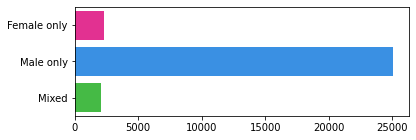

In [12]:
categories_counts= new_df['Group Gender'].value_counts().sort_index()
plt.figure(figsize=(6,2))
ax = sns.barplot(y=categories_counts.index, x=categories_counts.values,palette=["deeppink", "dodgerblue", "limegreen"])
print(categories_counts)

In [13]:
for i in range (0, 29501):
    new_df.loc[i, 'Category Groups']

In [14]:
for i in range (0, 29501):
    new_df.loc[i, 'Category Groups'] = new_df.loc[i, 'Category Groups'].rsplit(',',10)[0]
new_df['Category Groups']

0          Clothing and Apparel
1         Commerce and Shopping
2             Internet Services
3                          Apps
4                        Energy
                  ...          
29496                      Apps
29497        Financial Services
29498    Information Technology
29499             Biotechnology
29500         Food and Beverage
Name: Category Groups, Length: 29501, dtype: object

In [15]:
#simplifying categories
new_df.loc[new_df['Category Groups'].str.contains('Finance|FinTech|Financial|Banking', case=False), 'Category Groups'] = 'Finance'
new_df.loc[new_df['Category Groups'].str.contains('Biotechnology', case=False), 'Category Groups'] = 'Biotechnology'
new_df.loc[new_df['Category Groups'].str.contains('Health Care', case=False), 'Category Groups'] = 'Health Care'
new_df.loc[new_df['Category Groups'].str.contains('E-Commerce|Commerce', case=False), 'Category Groups'] = 'Commerce'
new_df.loc[new_df['Category Groups'].str.contains('Software', case=False), 'Category Groups'] = 'Software'
new_df.loc[new_df['Category Groups'].str.contains('Internet', case=False), 'Category Groups'] = 'Internet'
new_df.loc[new_df['Category Groups'].str.contains('Information Technology', case=False), 'Category Groups'] = 'Information Technology'
new_df.loc[new_df['Category Groups'].str.contains('Education', case=False), 'Category Groups'] = 'Education'
new_df.loc[new_df['Category Groups'].str.contains('Network Security|Cyber Security', case=False), 'Category Groups'] = 'Security'
new_df.loc[new_df['Category Groups'].str.contains('Real Estate', case=False), 'Category Groups'] = 'Real Estate'
new_df.loc[new_df['Category Groups'].str.contains('Tourism', case=False), 'Category Groups'] = 'Tourism'
new_df.loc[new_df['Category Groups'].str.contains('Artificial Intelligence', case=False), 'Category Groups'] = 'Artificial Intelligence'
new_df.loc[new_df['Category Groups'].str.contains('Food', case=False), 'Category Groups'] = 'Food'
new_df.loc[new_df['Category Groups'].str.contains('Advertising', case=False), 'Category Groups'] = 'Advertising'
new_df.loc[new_df['Category Groups'].str.contains('Fashion', case=False), 'Category Groups'] = 'Fashion'
new_df.loc[new_df['Category Groups'].str.contains('Data', case=False), 'Category Groups'] = 'Data'
new_df.loc[new_df['Category Groups'].str.contains('Robotics', case=False), 'Category Groups'] = 'Robotics'
new_df.loc[new_df['Category Groups'].str.contains('Gaming', case=False), 'Category Groups'] = 'Gaming'
new_df.loc[new_df['Category Groups'].str.contains('Sports', case=False), 'Category Groups'] = 'Sports'
new_df.loc[new_df['Category Groups'].str.contains('Entertainment', case=False), 'Category Groups'] = 'Entertainment'
new_df.loc[new_df['Category Groups'].str.contains('Insurance', case=False), 'Category Groups'] = 'Insurance'
new_df.loc[new_df['Category Groups'].str.contains('Energy', case=False), 'Category Groups'] = 'Energy'
new_df.loc[new_df['Category Groups'].str.contains('Manufacturing', case=False), 'Category Groups'] = 'Manufacturing'



Commerce                   2924
Apps                       2490
Finance                    2204
Artificial Intelligence    2096
Biotechnology              1769
Health Care                1766
Data                       1594
Information Technology     1543
Consumer Electronics       1517
Advertising                1278
Hardware                   1193
Education                   944
Internet                    942
Community and Lifestyle     820
Clothing and Apparel        716
Content and Publishing      671
Energy                      554
Food                        495
Administrative Services     457
Agriculture and Farming     389
Gaming                      387
Software                    370
Entertainment               315
Real Estate                 219
Transportation              215
Consumer Goods              206
Events                      206
Mobile                      203
Design                      200
Professional Services       162
Name: Category Groups, dtype: int64
Comm

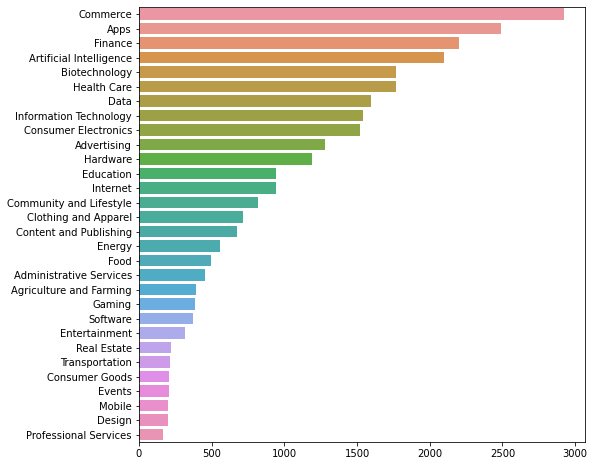

In [16]:
categories_counts= new_df['Category Groups'].value_counts().nlargest(30)
plt.figure(figsize=(8,8))
sns.barplot(y=categories_counts.index, x=categories_counts.values)
print(categories_counts)
print(categories_counts/categories_counts.sum())

Female only     299
Male only      2409
Mixed           216
Name: Group Gender, dtype: int64
Female only     192
Male only      2095
Mixed           203
Name: Group Gender, dtype: int64
Female only      99
Male only      1969
Mixed           136
Name: Group Gender, dtype: int64
Female only     130
Male only      1784
Mixed           182
Name: Group Gender, dtype: int64
Female only     156
Male only      1472
Mixed           141
Name: Group Gender, dtype: int64
Female only     179
Male only      1450
Mixed           137
Name: Group Gender, dtype: int64
Female only      74
Male only      1426
Mixed            94
Name: Group Gender, dtype: int64
Female only      60
Male only      1387
Mixed            96
Name: Group Gender, dtype: int64
Female only      79
Male only      1353
Mixed            85
Name: Group Gender, dtype: int64
Female only      65
Male only      1146
Mixed            67
Name: Group Gender, dtype: int64
Female only      48
Male only      1080
Mixed            65
Name: Grou

/usr/lib/python3/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


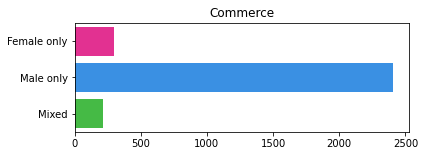

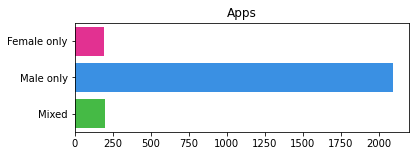

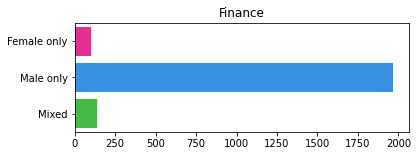

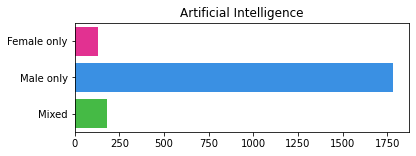

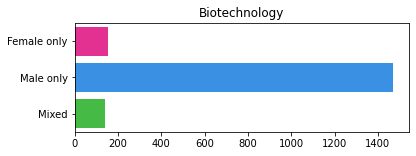

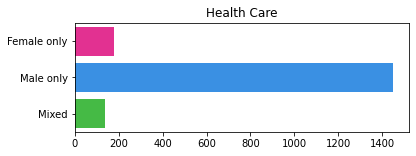

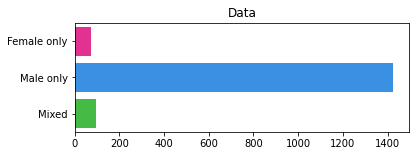

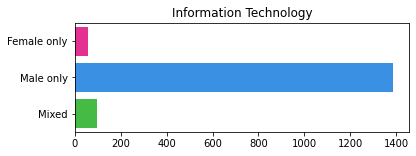

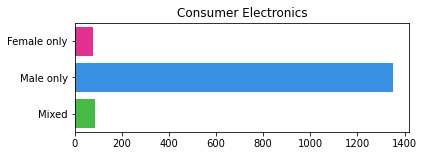

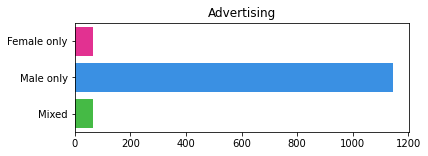

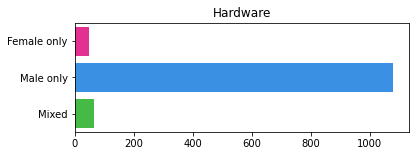

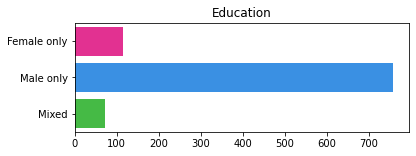

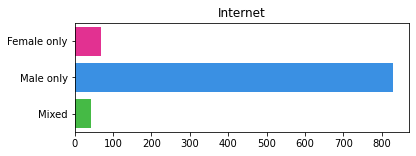

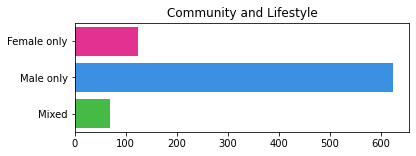

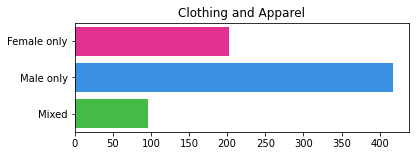

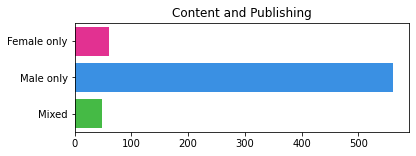

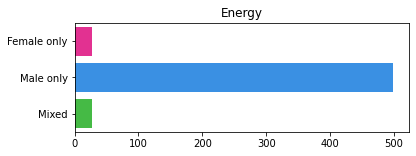

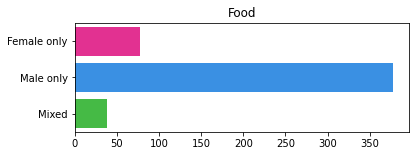

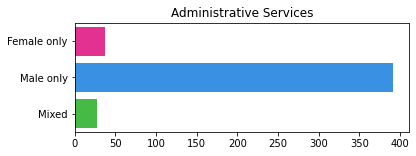

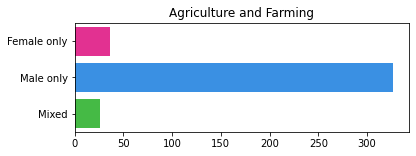

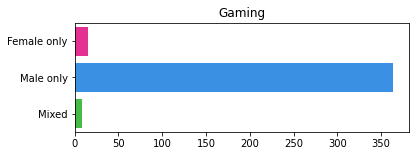

In [17]:
categories = ['Commerce','Apps','Finance','Artificial Intelligence','Biotechnology','Health Care',
              'Data','Information Technology','Consumer Electronics', 'Advertising','Hardware','Education',
              'Internet','Community and Lifestyle','Clothing and Apparel','Content and Publishing','Energy','Food',
              'Administrative Services','Agriculture and Farming','Gaming']

for i in categories:
    gender_Categories = new_df[new_df['Category Groups'] == i]
    categories_counts= gender_Categories['Group Gender'].value_counts().sort_index()
    print(categories_counts)
    plt.figure(figsize=(6,2))
    plt.title(i)
    sns.barplot(y=categories_counts.index, x=categories_counts.values,palette=["deeppink", "dodgerblue", "limegreen"])

In [18]:
#simplifying regions
new_df.loc[new_df['Headquarters Regions'].str.contains('Asia-Pacific', case=False), 'Headquarters Regions'] = 'APAC'
new_df.loc[new_df['Headquarters Regions'].str.contains('European Union', case=False), 'Headquarters Regions'] = 'EU'
new_df.loc[new_df['Headquarters Regions'].str.contains('San Francisco Bay Area', case=False), 'Headquarters Regions'] = 'Bay'
new_df.loc[new_df['Headquarters Regions'].str.contains('Greater New York Area, East Coast, Northeastern US', case=False), 'Headquarters Regions'] = 'NY'
new_df.loc[new_df['Headquarters Regions'].str.contains('Greater Boston Area, East Coast, New England', case=False), 'Headquarters Regions'] = 'BS'
new_df.loc[new_df['Headquarters Regions'].str.contains('Greater Los Angeles Area, West Coast, Western US', case=False), 'Headquarters Regions'] = 'LA'

In [19]:
new_df = new_df[(new_df['Headquarters Regions'] == 'EU')| (new_df['Headquarters Regions'] == 'Bay')| (new_df['Headquarters Regions'] == 'APAC')| (new_df['Headquarters Regions'] == 'NY')| (new_df['Headquarters Regions'] == 'LA')| (new_df['Headquarters Regions'] == 'BS')]

Bay     6037
EU      4600
APAC    4231
NY      2927
LA      1521
BS      1303
Name: Headquarters Regions, dtype: int64
Bay     0.292788
EU      0.223095
APAC    0.205199
NY      0.141956
LA      0.073767
BS      0.063194
Name: Headquarters Regions, dtype: float64


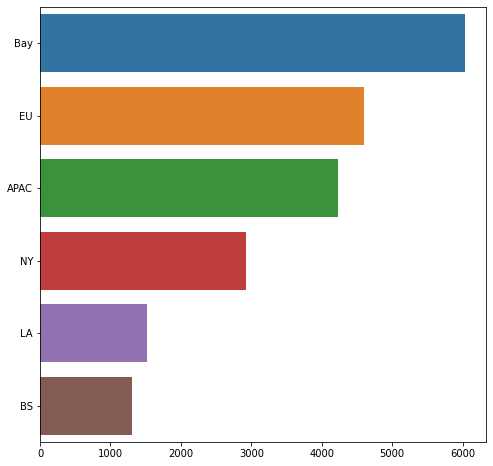

In [20]:
categories_counts= new_df['Headquarters Regions'].value_counts()
plt.figure(figsize=(8,8))
sns.barplot(y=categories_counts.index, x=categories_counts.values)
print(categories_counts)
print(categories_counts/categories_counts.sum())

In [21]:
#creating subdatasets for the top 6 regions
data_EU = new_df[new_df['Headquarters Regions'] == 'EU']
data_Bay = new_df[new_df['Headquarters Regions'] == 'Bay']
data_APAC = new_df[new_df['Headquarters Regions'] == 'APAC']
data_NY = new_df[new_df['Headquarters Regions'] == 'NY']
data_LA = new_df[new_df['Headquarters Regions'] == 'LA']
data_BO = new_df[new_df['Headquarters Regions'] == 'BS']

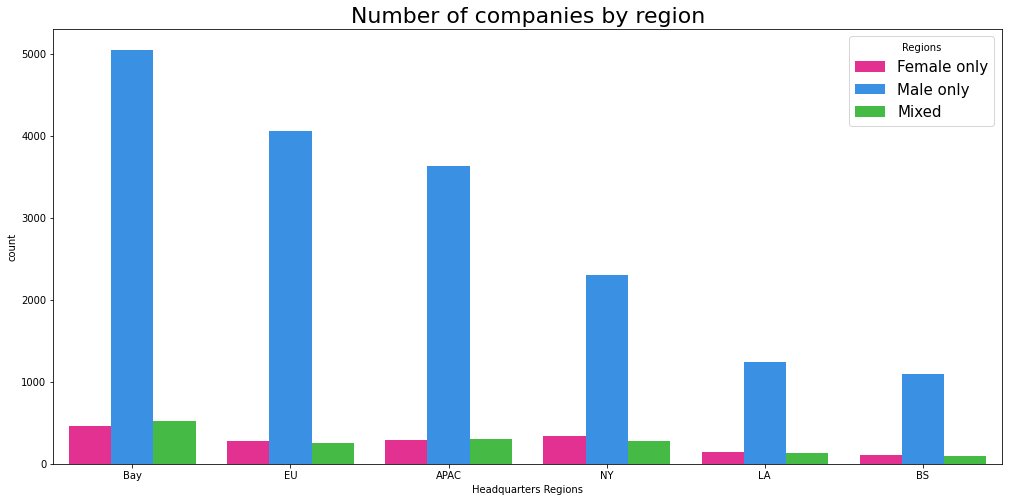

In [22]:
plt.figure(figsize=(17,8))
ax = sns.countplot(x='Headquarters Regions', hue='Group Gender', data=new_df, order=["Bay", "EU", "APAC", "NY", "LA", "BS"], hue_order=["Female only", "Male only", "Mixed"],palette=["deeppink", "dodgerblue", "limegreen"])
ax.axes.set_title("Number of companies by region", fontsize=22)
plt.setp(ax.get_xticklabels(), rotation=0, fontsize=10)
plt.legend(fontsize=15, title="Regions");

# fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(13,10))

# categories_counts= data_EU['Group Gender'].value_counts().sort_index()
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[0,0])
# axes[0,0].set_title('EU')

# categories_counts= data_Bay['Group Gender'].value_counts().sort_index()
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[0,1])
# axes[0,1].set_title('Bay')

# categories_counts= data_APAC['Group Gender'].value_counts().sort_index()
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[1,0])
# axes[1,0].set_title('APAC')

# categories_counts= data_NY['Group Gender'].value_counts().sort_index()
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[1,1])
# axes[1,1].set_title('NY')

# categories_counts= data_LA['Group Gender'].value_counts().sort_index()
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[2,0])
# axes[2,0].set_title('LA')

# categories_counts= data_BO['Group Gender'].value_counts().sort_index()
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[2,1])
# axes[2,1].set_title('BO')

# fig.tight_layout()

In [23]:
# col_names =  ['Region', 'Total Funding', 'Average Funding', 'Top 10 Average Funding']
# funding  = pd.DataFrame(columns = col_names)
# funding.loc[0] = ['Bay', data_Bay['Total Funding Amount Currency (in USD)'].sum(), data_Bay['Total Funding Amount Currency (in USD)'].sum()/len(data_Bay), data_Bay['Total Funding Amount Currency (in USD)'].nlargest(10).sum()/10]
# funding.loc[1] = ['EU', data_EU['Total Funding Amount Currency (in USD)'].sum(), data_EU['Total Funding Amount Currency (in USD)'].sum()/len(data_EU), data_EU['Total Funding Amount Currency (in USD)'].nlargest(10).sum()/10]
# funding.loc[2] = ['APAC', data_APAC['Total Funding Amount Currency (in USD)'].sum(), data_APAC['Total Funding Amount Currency (in USD)'].sum()/len(data_APAC), data_APAC['Total Funding Amount Currency (in USD)'].nlargest(10).sum()/10]
# funding.loc[3] = ['NY', data_NY['Total Funding Amount Currency (in USD)'].sum(), data_NY['Total Funding Amount Currency (in USD)'].sum()/len(data_NY), data_NY['Total Funding Amount Currency (in USD)'].nlargest(10).sum()/10]
# funding.loc[4] = ['LA', data_LA['Total Funding Amount Currency (in USD)'].sum(), data_LA['Total Funding Amount Currency (in USD)'].sum()/len(data_LA), data_LA['Total Funding Amount Currency (in USD)'].nlargest(10).sum()/10]
# funding.loc[5] = ['BS', data_BO['Total Funding Amount Currency (in USD)'].sum(), data_BO['Total Funding Amount Currency (in USD)'].sum()/len(data_BO), data_BO['Total Funding Amount Currency (in USD)'].nlargest(10).sum()/10]
# funding = funding.sort_values('Total Funding', ascending=False).sort_index()
# funding.plot.bar(x='Region', y='Total Funding', rot=0)
# funding = funding.sort_values('Average Funding', ascending=False).sort_index()
# funding.plot.bar(x='Region', y='Average Funding', rot=0)
# funding = funding.sort_values('Top 10 Average Funding', ascending=False).sort_index()
# funding.plot.bar(x='Region', y='Top 10 Average Funding', rot=0)

In [24]:
# #average vs total bay/apac (too many comapines in Bay area)
# Bay_10 = data_Bay.sort_values('Total Funding Amount Currency (in USD)', ascending=False).head(10)
# rg = Bay_10.plot.bar(x='Organization Name', y='Total Funding Amount Currency (in USD)', rot=0, figsize=(10,5),title = 'Bay Top 10')
# plt.setp(rg.get_xticklabels(), rotation=90)

# EU_10 = data_EU.sort_values('Total Funding Amount Currency (in USD)', ascending=False).head(10)
# rg = EU_10.plot.bar(x='Organization Name', y='Total Funding Amount Currency (in USD)', rot=0, figsize=(10,5),title = 'EU Top 10')
# plt.setp(rg.get_xticklabels(), rotation=90)

# APAC_10 = data_APAC.sort_values('Total Funding Amount Currency (in USD)', ascending=False).head(10)
# rg = APAC_10.plot.bar(x='Organization Name', y='Total Funding Amount Currency (in USD)', rot=0, figsize=(10,5),title = 'APAC Top 10')
# plt.setp(rg.get_xticklabels(), rotation=90)

# NY_10 = data_NY.sort_values('Total Funding Amount Currency (in USD)', ascending=False).head(10)
# rg = NY_10.plot.bar(x='Organization Name', y='Total Funding Amount Currency (in USD)', rot=0, figsize=(10,5),title = 'NY Top 10')
# plt.setp(rg.get_xticklabels(), rotation=90)

# LA_10 = data_LA.sort_values('Total Funding Amount Currency (in USD)', ascending=False).head(10)
# rg = LA_10.plot.bar(x='Organization Name', y='Total Funding Amount Currency (in USD)', rot=0, figsize=(10,5),title = 'LA Top 10')
# plt.setp(rg.get_xticklabels(), rotation=90)

# BO_10 = data_BO.sort_values('Total Funding Amount Currency (in USD)', ascending=False).head(10)
# rg = BO_10.plot.bar(x='Organization Name', y='Total Funding Amount Currency (in USD)', rot=0, figsize=(10,5),title = 'BO Top 10')
# plt.setp(rg.get_xticklabels(), rotation=90)

In [25]:
cats = ['Apps','Finance','Artificial Intelligence','Biotechnology','Health Care','Data','Information Technology','Consumer Electronics',
'Advertising','Hardware','Education','Internet','Community and Lifestyle','Clothing and Apparel','Content and Publishing','Energy','Food','Administrative Services','Agriculture and Farming','Gaming']
df_cat = new_df[new_df['Category Groups'] == 'Commerce']
for i in cats:
    df = new_df[new_df['Category Groups'] == i]
    df_cat = df_cat.append(df)

regions = ['EU','APAC', 'NY', 'LA','BS']

df_cat_reg = df_cat[df_cat['Headquarters Regions'] == 'Bay']
for i in regions:
    df = df_cat[df_cat['Headquarters Regions'] == i]
    df_cat_reg = df_cat_reg.append(df)

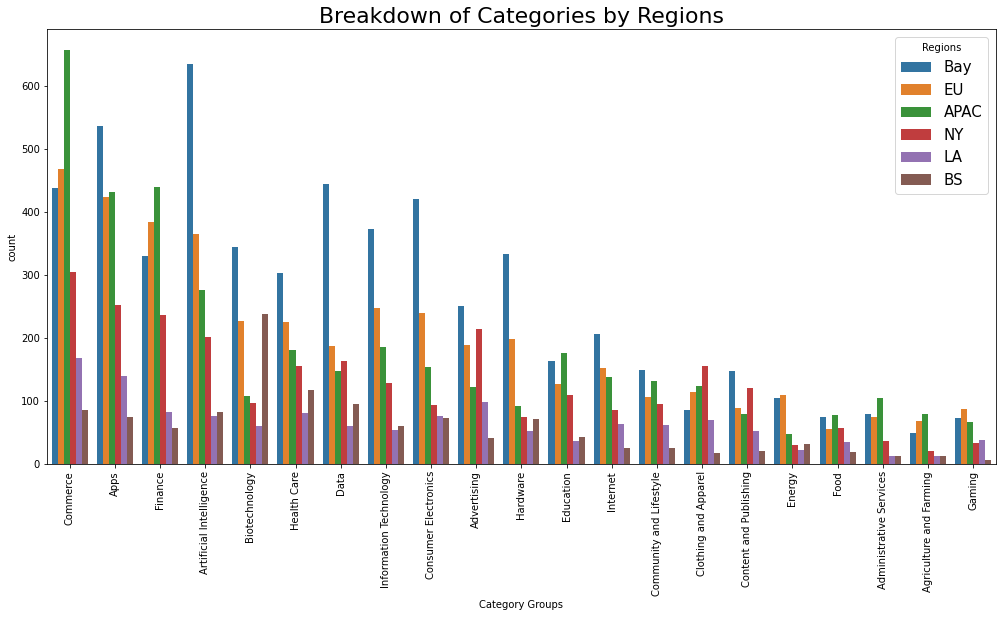

In [26]:
plt.figure(figsize=(17,8))
ax = sns.countplot(x='Category Groups', hue='Headquarters Regions', data=df_cat_reg)
ax.axes.set_title("Breakdown of Categories by Regions", fontsize=22)
plt.setp(ax.get_xticklabels(), rotation=90, fontsize=10)
plt.legend(fontsize=15, title="Regions");

In [27]:
#creating subdatasets for the top 6 regions
data_EU_cat = df_cat[df_cat['Headquarters Regions'] == 'EU']
data_Bay_cat = df_cat[df_cat['Headquarters Regions'] == 'Bay']
data_APAC_cat = df_cat[df_cat['Headquarters Regions'] == 'APAC']
data_NY_cat = df_cat[df_cat['Headquarters Regions'] == 'NY']
data_LA_cat = df_cat[df_cat['Headquarters Regions'] == 'LA']
data_BO_cat = df_cat[df_cat['Headquarters Regions'] == 'BS']

1.0     6035
2.0     5159
3.0     3578
4.0     2376
5.0     1404
6.0      875
7.0      513
8.0      274
9.0      155
10.0      89
11.0      52
12.0      40
13.0      24
14.0      11
15.0       9
16.0       6
17.0       7
18.0       3
19.0       1
20.0       3
23.0       2
25.0       1
34.0       1
41.0       1
Name: Number of Funding Rounds, dtype: int64


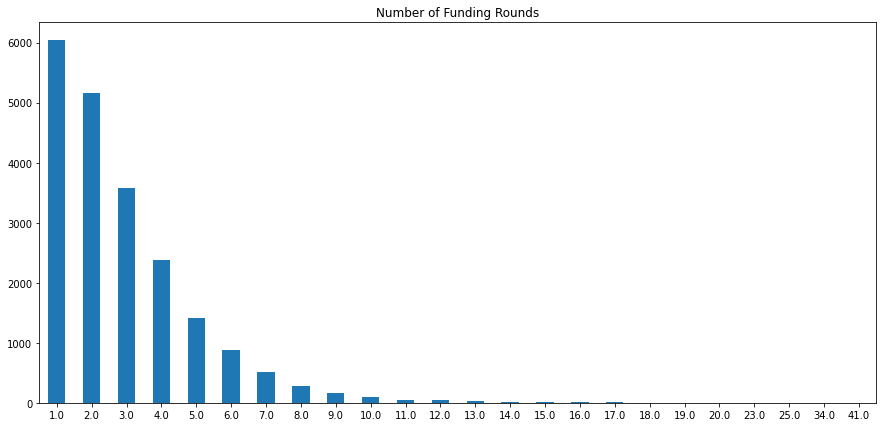

In [28]:
categories_counts= new_df['Number of Funding Rounds'].value_counts().sort_index()
plt.figure(figsize=(15,7))
plt.title('Number of Funding Rounds')
categories_counts.plot.bar(x='Number of Funding Rounds', rot=0)
print(categories_counts)

Seed                        6183
Venture - Series Unknown    3270
Series A                    3113
Series B                    1934
Series C                     961
Angel                        653
Debt Financing               598
Grant                        592
Convertible Note             519
Series D                     452
Pre-Seed                     427
Private Equity               279
Undisclosed                  270
Post-IPO Equity              236
Corporate Round              207
Series E                     200
Equity Crowdfunding          160
Non-equity Assistance        115
Secondary Market             112
Initial Coin Offering         97
Product Crowdfunding          78
Series F                      77
Post-IPO Debt                 48
Series G                      23
Series H                      10
Post-IPO Secondary             3
Series J                       1
Series I                       1
Name: Last Funding Type, dtype: int64


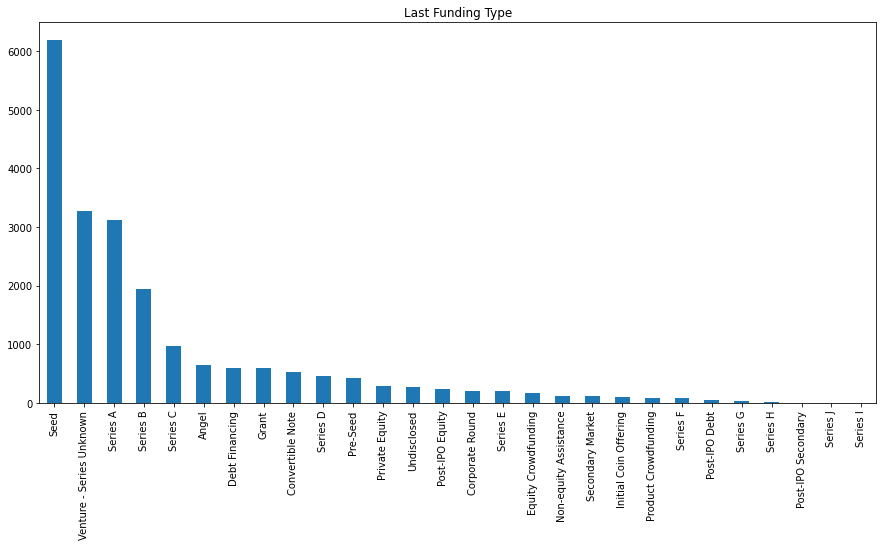

In [29]:
# new_df = new_df[new_df['Last Funding Type']!= 'Venture - Series Unknown']
# new_df = new_df[new_df['Last Funding Type']!= 'Undisclosed']
# new_df = new_df[new_df['Last Funding Type']!= 'Debt Financing']
# new_df = new_df[new_df['Last Funding Type']!= 'Grant']
# new_df = new_df[new_df['Last Funding Type']!= 'Convertible Note']
# new_df = new_df[new_df['Last Funding Type']!= 'Post-IPO Equity']
# new_df = new_df[new_df['Last Funding Type']!= 'Corporate Round']
# new_df = new_df[new_df['Last Funding Type']!= 'Equity Crowdfunding']
# new_df = new_df[new_df['Last Funding Type']!= 'Non-equity Assistance']
# new_df = new_df[new_df['Last Funding Type']!= 'Initial Coin Offering']
# new_df = new_df[new_df['Last Funding Type']!= 'Product Crowdfunding']
# new_df = new_df[new_df['Last Funding Type']!= 'Secondary Market']


# new_df.loc[new_df['Last Funding Type'].str.contains('Series E|Series G|Series H|Series I|Series J', case=False), 'Last Funding Type'] = 'Series F+'
# new_df.loc[new_df['Last Funding Type'].str.contains('IPO', case=False), 'Last Funding Type'] = 'IPO'

categories_counts= new_df['Last Funding Type'].value_counts()
plt.figure(figsize=(15,7))
plt.title('Last Funding Type')
categories_counts.plot.bar(x='Last Funding Type', rot=90)
print(categories_counts)

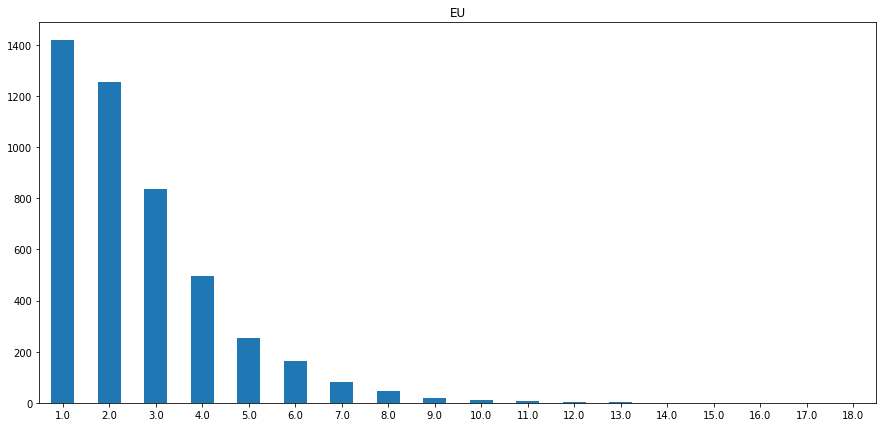

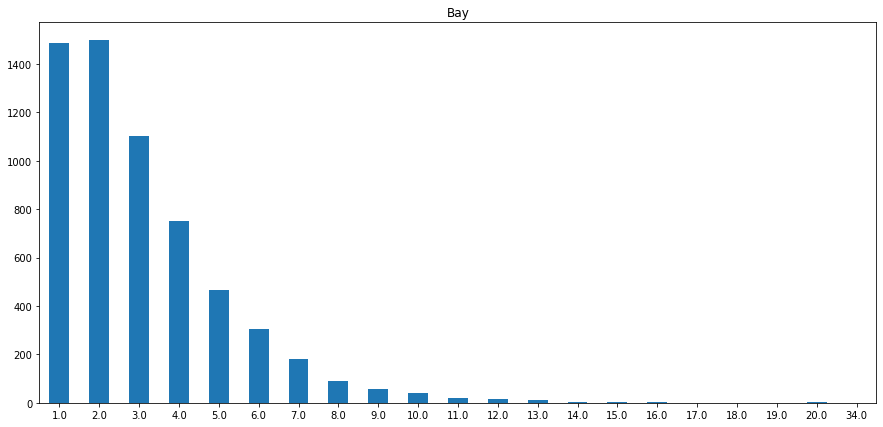

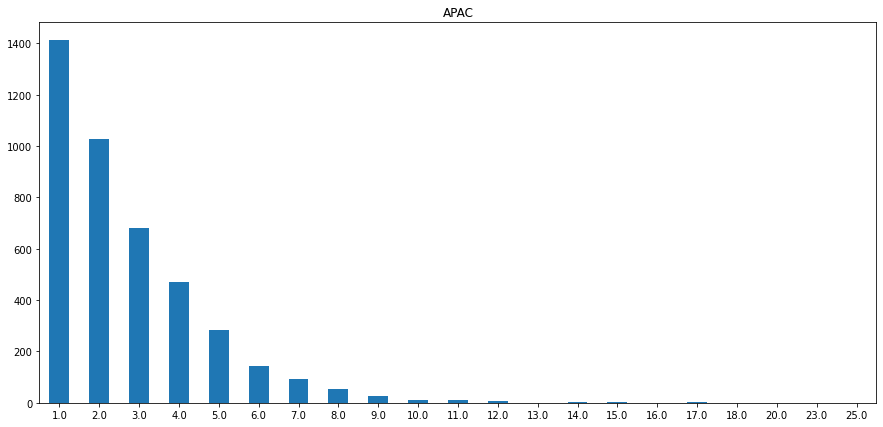

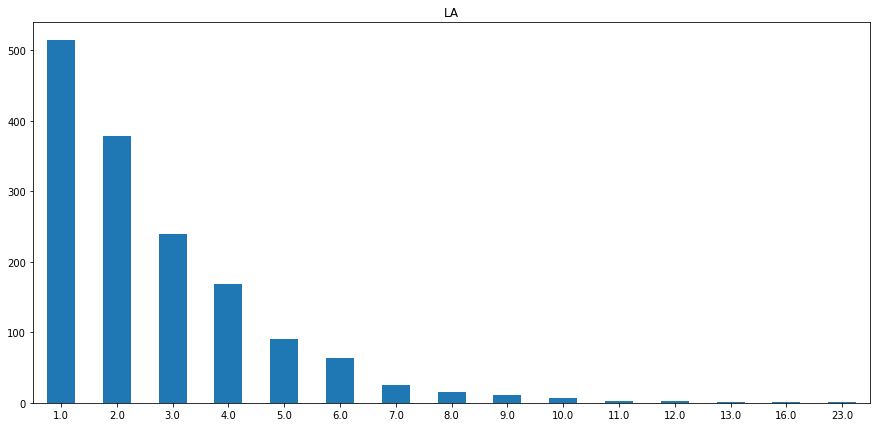

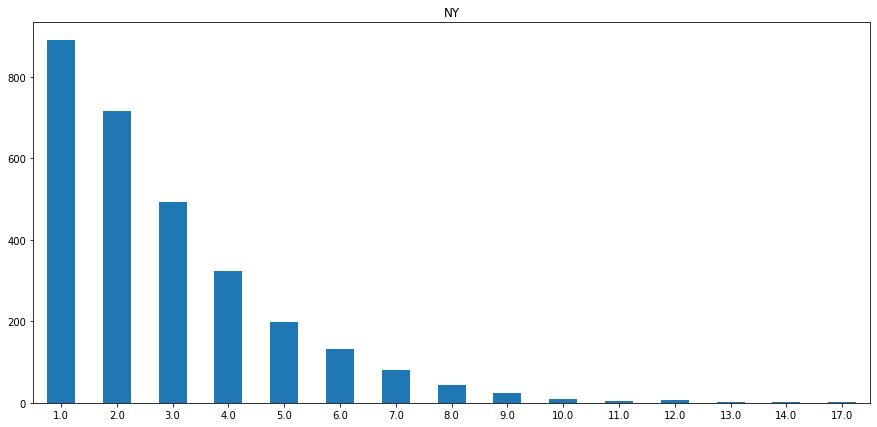

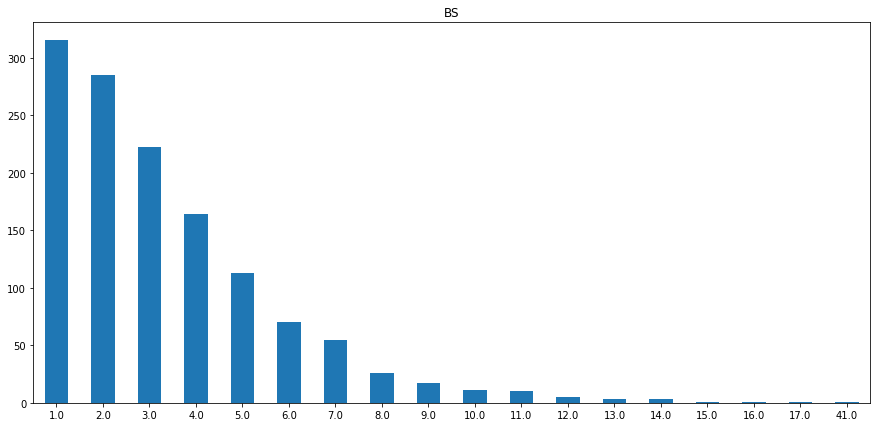

In [30]:
categories_counts= data_EU['Number of Funding Rounds'].value_counts().sort_index()
plt.figure(figsize=(15,7))
categories_counts.plot.bar(x='Number of Funding Rounds', rot=0,title = 'EU')

categories_counts= data_Bay['Number of Funding Rounds'].value_counts().sort_index()
plt.figure(figsize=(15,7))
categories_counts.plot.bar(x='Number of Funding Rounds', rot=0,title = 'Bay')

categories_counts= data_APAC['Number of Funding Rounds'].value_counts().sort_index()
plt.figure(figsize=(15,7))
categories_counts.plot.bar(x='Number of Funding Rounds', rot=0,title = 'APAC')

categories_counts= data_LA['Number of Funding Rounds'].value_counts().sort_index()
plt.figure(figsize=(15,7))
categories_counts.plot.bar(x='Number of Funding Rounds', rot=0,title = 'LA')

categories_counts= data_NY['Number of Funding Rounds'].value_counts().sort_index()
plt.figure(figsize=(15,7))
categories_counts.plot.bar(x='Number of Funding Rounds', rot=0,title = 'NY')

categories_counts= data_BO['Number of Funding Rounds'].value_counts().sort_index()
plt.figure(figsize=(15,7))
categories_counts.plot.bar(x='Number of Funding Rounds', rot=0,title = 'BS')

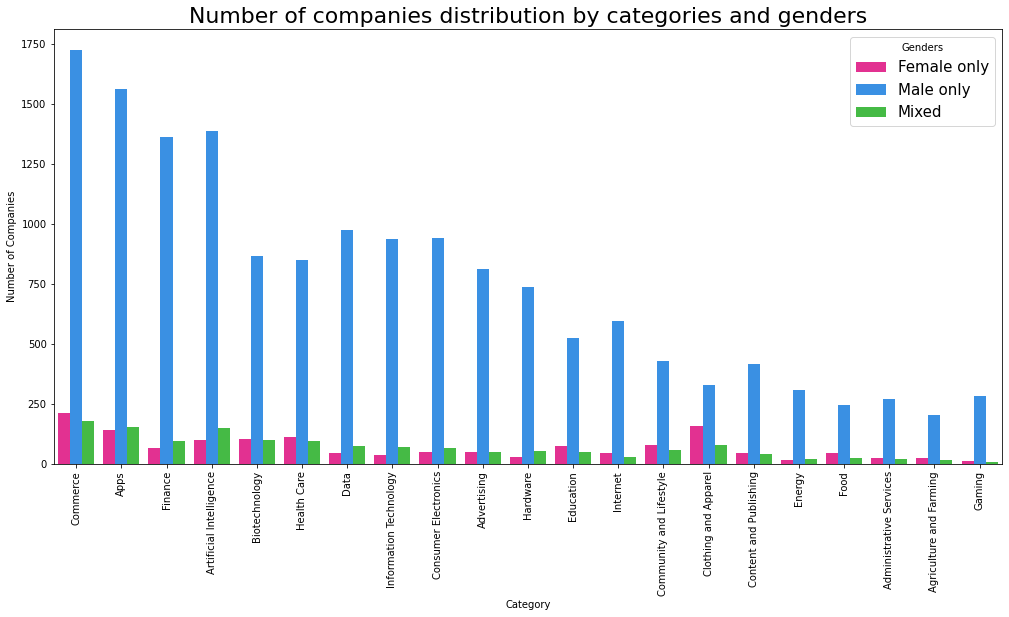

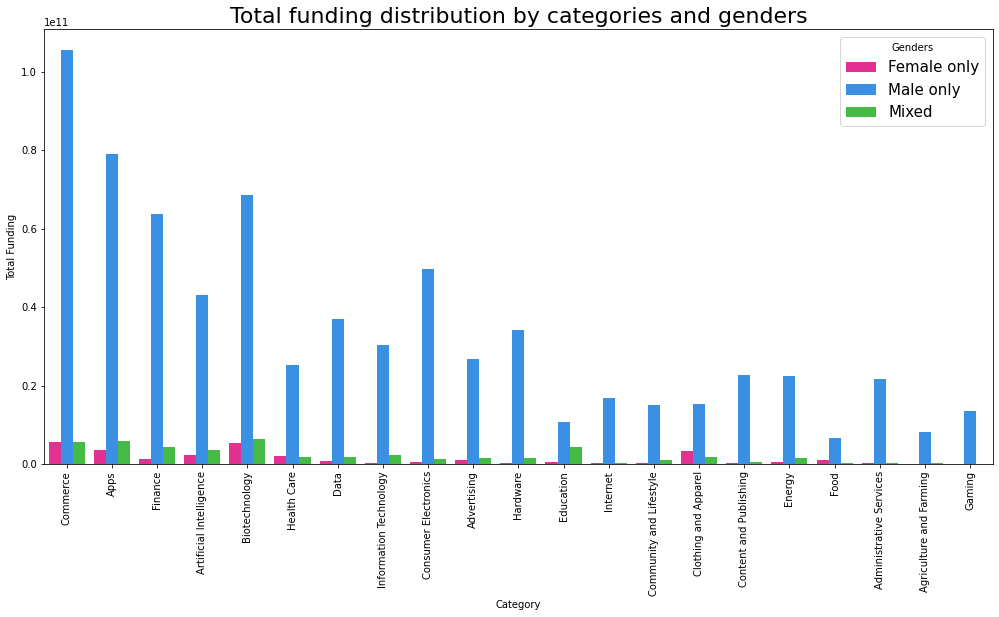

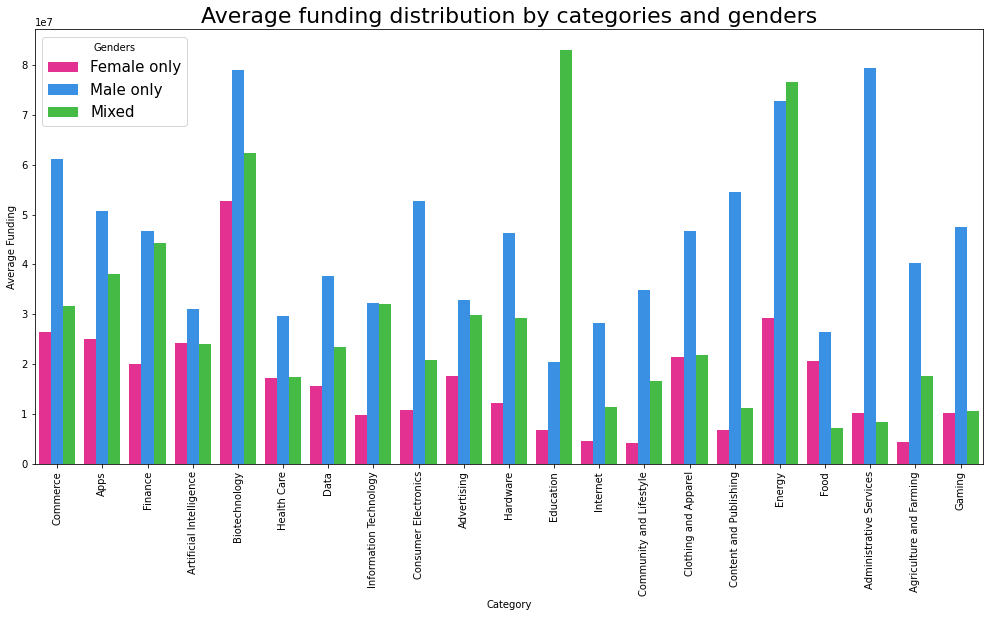

In [31]:
col_names =  [ 'Category','Group Gender','Total Funding', 'Number of Companies','Average Funding']
categories = ['Commerce','Apps','Finance','Artificial Intelligence','Biotechnology','Health Care','Data','Information Technology','Consumer Electronics',
'Advertising','Hardware','Education','Internet','Community and Lifestyle','Clothing and Apparel','Content and Publishing','Energy','Food','Administrative Services','Agriculture and Farming','Gaming']

genders = ["Female only", "Male only", "Mixed"]

funding  = pd.DataFrame(columns = col_names)
count = 0
for i in categories:
    for j in genders:
            funding.loc[count] = [ i, j, new_df[(new_df['Category Groups']==i)&(new_df['Group Gender']==j)]['Total Funding Amount Currency (in USD)'].sum(),
                          len(new_df[(new_df['Category Groups']==i)&(new_df['Group Gender']==j)]),0]
            if (funding.at[count,'Number of Companies']!= 0):
                funding.at[count,'Average Funding'] = funding.at[count,'Total Funding']/funding.at[count,'Number of Companies']
            count = count + 1

plt.figure(figsize=(17,8))
ax = sns.barplot(x='Category', y='Number of Companies', hue='Group Gender', data=funding, ci = None, order=['Commerce','Apps','Finance','Artificial Intelligence','Biotechnology','Health Care','Data','Information Technology','Consumer Electronics',
'Advertising','Hardware','Education','Internet','Community and Lifestyle','Clothing and Apparel','Content and Publishing','Energy','Food','Administrative Services','Agriculture and Farming','Gaming'], hue_order=["Female only", "Male only", "Mixed"],palette=["deeppink", "dodgerblue", "limegreen"])
ax.axes.set_title("Number of companies distribution by categories and genders", fontsize=22)
plt.setp(ax.get_xticklabels(), rotation=90, fontsize=10)
plt.legend(fontsize=15, title="Genders")

plt.figure(figsize=(17,8))
ax = sns.barplot(x='Category', y='Total Funding', hue='Group Gender', data=funding, ci = None, order=['Commerce','Apps','Finance','Artificial Intelligence','Biotechnology','Health Care','Data','Information Technology','Consumer Electronics',
'Advertising','Hardware','Education','Internet','Community and Lifestyle','Clothing and Apparel','Content and Publishing','Energy','Food','Administrative Services','Agriculture and Farming','Gaming'], hue_order=["Female only", "Male only", "Mixed"],palette=["deeppink", "dodgerblue", "limegreen"])
ax.axes.set_title("Total funding distribution by categories and genders", fontsize=22)
plt.setp(ax.get_xticklabels(), rotation=90, fontsize=10)
plt.legend(fontsize=15, title="Genders")


plt.figure(figsize=(17,8))
ax = sns.barplot(x='Category', y='Average Funding', hue='Group Gender', data=funding, ci = None, order=['Commerce','Apps','Finance','Artificial Intelligence','Biotechnology','Health Care','Data','Information Technology','Consumer Electronics',
'Advertising','Hardware','Education','Internet','Community and Lifestyle','Clothing and Apparel','Content and Publishing','Energy','Food','Administrative Services','Agriculture and Farming','Gaming'], hue_order=["Female only", "Male only", "Mixed"],palette=["deeppink", "dodgerblue", "limegreen"])
ax.axes.set_title("Average funding distribution by categories and genders", fontsize=22)
plt.setp(ax.get_xticklabels(), rotation=90, fontsize=10)
plt.legend(fontsize=15, title="Genders")
# fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(13,15))

# rg=avgfunding_Bay.plot.bar(x='Category', y='Average Funding', rot=0, title = 'Bay', ax=axes[0,0])
# plt.setp(rg.get_xticklabels(), rotation=90)
# rg=avgfunding_APAC.plot.bar(x='Category', y='Average Funding', rot=0, title = 'APAC', ax=axes[0,1])
# plt.setp(rg.get_xticklabels(), rotation=90)
# rg=avgfunding_EU.plot.bar(x='Category', y='Average Funding', rot=0, title = 'EU', ax=axes[1,0])
# plt.setp(rg.get_xticklabels(), rotation=90)
# rg=avgfunding_LA.plot.bar(x='Category', y='Average Funding', rot=0, title = 'LA', ax=axes[1,1])
# plt.setp(rg.get_xticklabels(), rotation=90)
# rg=avgfunding_NY.plot.bar(x='Category', y='Average Funding', rot=0, title = 'NY', ax=axes[2,0])
# plt.setp(rg.get_xticklabels(), rotation=90)
# rg=avgfunding_BO.plot.bar(x='Category', y='Average Funding', rot=0, title = 'BO', ax=axes[2,1])
# plt.setp(rg.get_xticklabels(), rotation=90)


# fig.tight_layout()


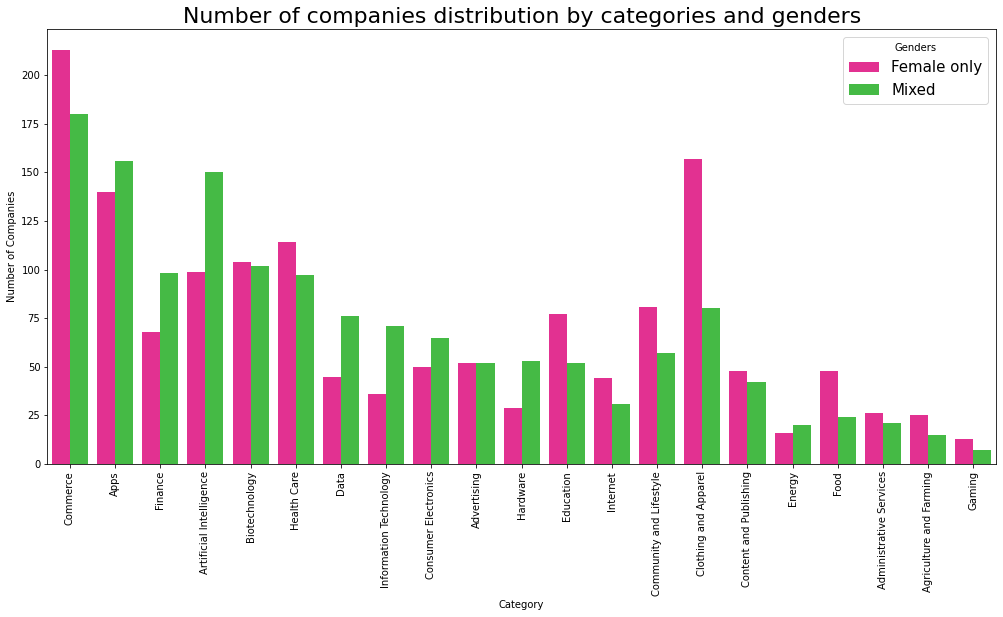

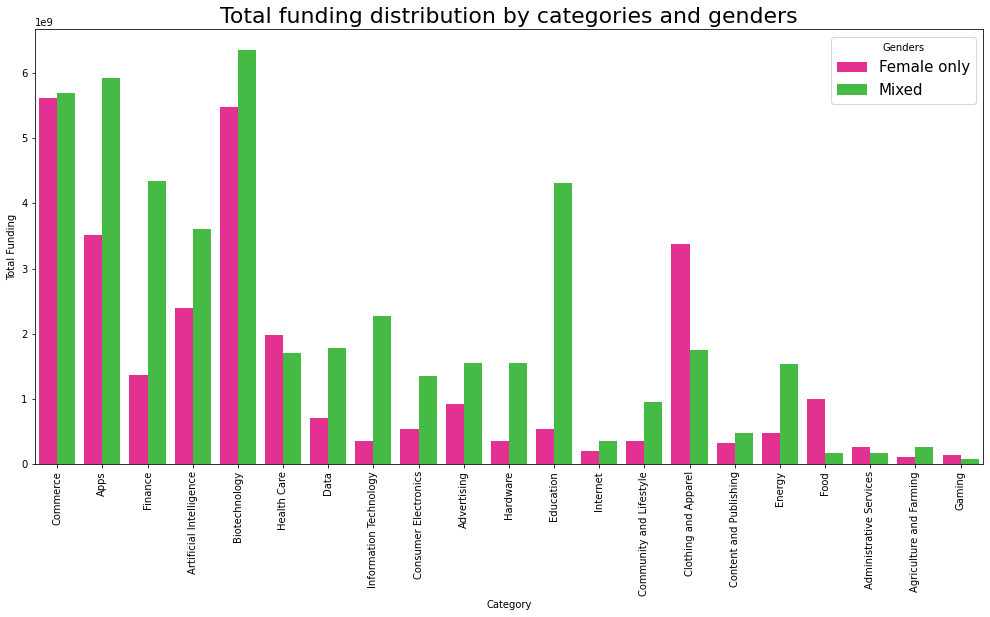

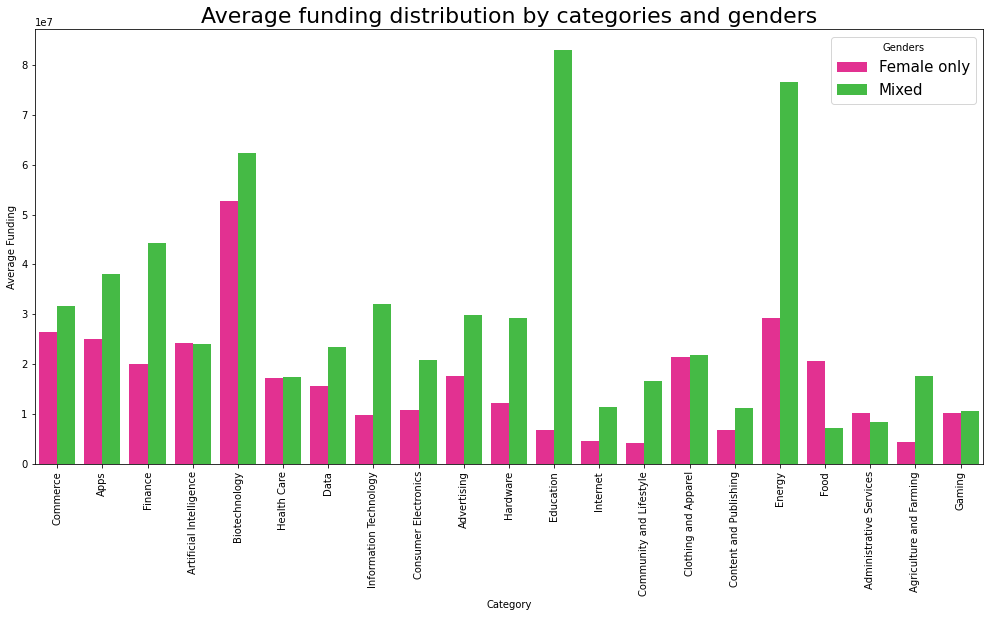

In [32]:
col_names =  [ 'Category' , 'Gender','Total Funding', 'Number of Companies','Average Funding']
categories = ['Commerce','Apps','Finance','Artificial Intelligence','Biotechnology','Health Care','Data','Information Technology','Consumer Electronics',
'Advertising','Hardware','Education','Internet','Community and Lifestyle','Clothing and Apparel','Content and Publishing','Energy','Food','Administrative Services','Agriculture and Farming','Gaming']

genders = ['Female only', 'Mixed']

funding  = pd.DataFrame(columns = col_names)
count = 0
for i in categories:
    for j in genders:
            funding.loc[count] = [ i, j, new_df[(new_df['Category Groups']==i)&(new_df['Group Gender']==j)]['Total Funding Amount Currency (in USD)'].sum(),
                          len(new_df[(new_df['Category Groups']==i)&(new_df['Group Gender']==j)]),0]
            if (funding.at[count,'Number of Companies']!= 0):
                funding.at[count,'Average Funding'] = funding.at[count,'Total Funding']/funding.at[count,'Number of Companies']
            count = count + 1

plt.figure(figsize=(17,8))
ax = sns.barplot(x='Category', y='Number of Companies', hue='Gender', data=funding, ci = None, order=['Commerce','Apps','Finance','Artificial Intelligence','Biotechnology','Health Care','Data','Information Technology','Consumer Electronics',
'Advertising','Hardware','Education','Internet','Community and Lifestyle','Clothing and Apparel','Content and Publishing','Energy','Food','Administrative Services','Agriculture and Farming','Gaming'], hue_order=["Female only", "Mixed"],palette=["deeppink", "limegreen"])
ax.axes.set_title("Number of companies distribution by categories and genders", fontsize=22)
plt.setp(ax.get_xticklabels(), rotation=90, fontsize=10)
plt.legend(fontsize=15, title="Genders")

plt.figure(figsize=(17,8))
ax = sns.barplot(x='Category', y='Total Funding', hue='Gender', data=funding, ci = None, order=['Commerce','Apps','Finance','Artificial Intelligence','Biotechnology','Health Care','Data','Information Technology','Consumer Electronics',
'Advertising','Hardware','Education','Internet','Community and Lifestyle','Clothing and Apparel','Content and Publishing','Energy','Food','Administrative Services','Agriculture and Farming','Gaming'], hue_order=["Female only", "Mixed"],palette=["deeppink", "limegreen"])
ax.axes.set_title("Total funding distribution by categories and genders", fontsize=22)
plt.setp(ax.get_xticklabels(), rotation=90, fontsize=10)
plt.legend(fontsize=15, title="Genders")


plt.figure(figsize=(17,8))
ax = sns.barplot(x='Category', y='Average Funding', hue='Gender', data=funding, ci = None, order=['Commerce','Apps','Finance','Artificial Intelligence','Biotechnology','Health Care','Data','Information Technology','Consumer Electronics',
'Advertising','Hardware','Education','Internet','Community and Lifestyle','Clothing and Apparel','Content and Publishing','Energy','Food','Administrative Services','Agriculture and Farming','Gaming'], hue_order=["Female only", "Mixed"],palette=["deeppink", "limegreen"])
ax.axes.set_title("Average funding distribution by categories and genders", fontsize=22)
plt.setp(ax.get_xticklabels(), rotation=90, fontsize=10)
plt.legend(fontsize=15, title="Genders")
# fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(13,15))

# rg=avgfunding_Bay.plot.bar(x='Category', y='Average Funding', rot=0, title = 'Bay', ax=axes[0,0])
# plt.setp(rg.get_xticklabels(), rotation=90)
# rg=avgfunding_APAC.plot.bar(x='Category', y='Average Funding', rot=0, title = 'APAC', ax=axes[0,1])
# plt.setp(rg.get_xticklabels(), rotation=90)
# rg=avgfunding_EU.plot.bar(x='Category', y='Average Funding', rot=0, title = 'EU', ax=axes[1,0])
# plt.setp(rg.get_xticklabels(), rotation=90)
# rg=avgfunding_LA.plot.bar(x='Category', y='Average Funding', rot=0, title = 'LA', ax=axes[1,1])
# plt.setp(rg.get_xticklabels(), rotation=90)
# rg=avgfunding_NY.plot.bar(x='Category', y='Average Funding', rot=0, title = 'NY', ax=axes[2,0])
# plt.setp(rg.get_xticklabels(), rotation=90)
# rg=avgfunding_BO.plot.bar(x='Category', y='Average Funding', rot=0, title = 'BO', ax=axes[2,1])
# plt.setp(rg.get_xticklabels(), rotation=90)


# fig.tight_layout()


       Genders  Total Funding  Average Funding
0  Female only   3.120591e+10     1.920364e+07
1    Male only   7.993133e+11     4.590325e+07
2        Mixed   4.897788e+10     3.097905e+07


Text(0.5, 1.0, 'Global Total Funding')

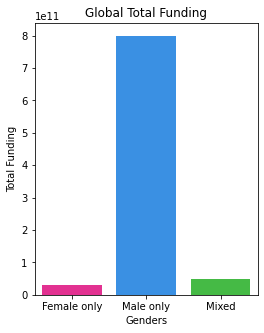

In [33]:
#total&average for all genders comparison
col_names =  ['Genders', 'Total Funding', 'Average Funding']
funding  = pd.DataFrame(columns = col_names)
funding.loc[0] = ['Female only', new_df[new_df['Group Gender']=='Female only']['Total Funding Amount Currency (in USD)'].sum(),
                  new_df[new_df['Group Gender']=='Female only']['Total Funding Amount Currency (in USD)'].sum()/len(new_df[new_df['Group Gender']=='Female only'])]
funding.loc[1] = ['Male only', new_df[new_df['Group Gender']=='Male only']['Total Funding Amount Currency (in USD)'].sum(),
                  new_df[new_df['Group Gender']=='Male only']['Total Funding Amount Currency (in USD)'].sum()/len(new_df[new_df['Group Gender']=='Male only'])]
funding.loc[2] = ['Mixed', new_df[new_df['Group Gender']=='Mixed']['Total Funding Amount Currency (in USD)'].sum(),
                  new_df[new_df['Group Gender']=='Mixed']['Total Funding Amount Currency (in USD)'].sum()/len(new_df[new_df['Group Gender']=='Mixed'])]
print (funding)
plt.figure(figsize=(4,5))
ax = sns.barplot(x='Genders', y='Total Funding', data=funding, palette=["deeppink", "dodgerblue", "limegreen"])
ax.axes.set_title('Global Total Funding')

Text(0.5, 1.0, 'Global Average Funding')

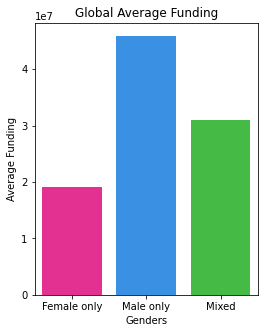

In [34]:
plt.figure(figsize=(4,5))
ax = sns.barplot(x='Genders', y='Average Funding', data=funding, palette=["deeppink", "dodgerblue", "limegreen"])
ax.axes.set_title('Global Average Funding')

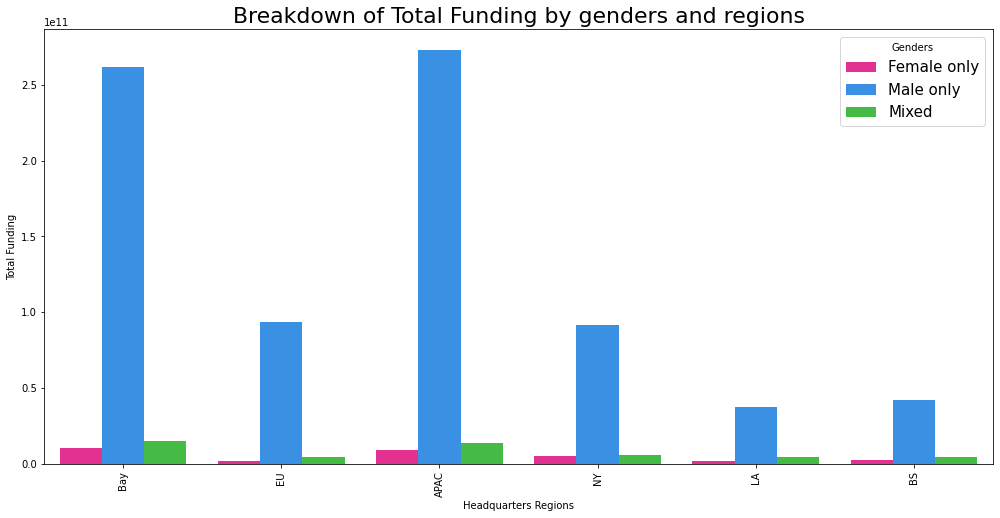

In [35]:
col_names =  ['Genders', 'Headquarters Regions', 'Total Funding', 'Average Funding']
genders = ['Female only', 'Male only', 'Mixed']
regions = ["Bay", "EU", "APAC", "NY", "LA", "BS"]
funding  = pd.DataFrame(columns = col_names)
count = 0
for i in genders:
    for j in regions:
        funding.loc[count] = [i, j, new_df[(new_df['Group Gender']==i) & (new_df['Headquarters Regions']==j)]['Total Funding Amount Currency (in USD)'].sum(),
                          new_df[(new_df['Group Gender']==i) & (new_df['Headquarters Regions']==j)]['Total Funding Amount Currency (in USD)'].sum()/
                          len(new_df[(new_df['Group Gender']==i) & (new_df['Headquarters Regions']==j)])]
        count = count + 1

plt.figure(figsize=(17,8))
ax = sns.barplot(x='Headquarters Regions', y='Total Funding', hue='Genders', data=funding, ci = None, order=["Bay", "EU", "APAC", "NY", "LA", "BS"], hue_order=["Female only", "Male only", "Mixed"],palette=["deeppink", "dodgerblue", "limegreen"])
ax.axes.set_title("Breakdown of Total Funding by genders and regions", fontsize=22)
plt.setp(ax.get_xticklabels(), rotation=90, fontsize=10)
plt.legend(fontsize=15, title="Genders");

# col_names =  ['Genders', 'Total Funding', 'Average Funding']
# genders = ['Female only', 'Male only', 'Mixed']
# funding  = pd.DataFrame(columns = col_names)
# count = 0
# for i in genders:
#     funding.loc[count] = [i, data_Bay[data_Bay['Group Gender']==i]['Total Funding Amount Currency (in USD)'].sum(),
#                           data_Bay[data_Bay['Group Gender']==i]['Total Funding Amount Currency (in USD)'].sum()/
#                           len(data_Bay[data_Bay['Group Gender']==i])]
#     count = count + 1

# totalfunding_Bay = funding.sort_values('Total Funding', ascending=False).sort_index()
# avgfunding_Bay = funding.sort_values('Average Funding', ascending=False).sort_index()

# count = 0
# for i in genders:
#     funding.loc[count] = [i, data_APAC[data_APAC['Group Gender']==i]['Total Funding Amount Currency (in USD)'].sum(),
#                           data_APAC[data_APAC['Group Gender']==i]['Total Funding Amount Currency (in USD)'].sum()/
#                           len(data_APAC[data_APAC['Group Gender']==i])]
#     count = count + 1
    
# totalfunding_APAC = funding.sort_values('Total Funding', ascending=False).sort_index()
# avgfunding_APAC = funding.sort_values('Average Funding', ascending=False).sort_index()

# count = 0

# for i in genders:
#     funding.loc[count] = [i, data_EU[data_EU['Group Gender']==i]['Total Funding Amount Currency (in USD)'].sum(),
#                           data_EU[data_EU['Group Gender']==i]['Total Funding Amount Currency (in USD)'].sum()/
#                           len(data_EU[data_EU['Group Gender']==i])]
#     count = count + 1

# totalfunding_EU = funding.sort_values('Total Funding', ascending=False).sort_index()
# avgfunding_EU = funding.sort_values('Average Funding', ascending=False).sort_index()

# count = 0
# for i in genders:
#     funding.loc[count] = [i, data_LA[data_LA['Group Gender']==i]['Total Funding Amount Currency (in USD)'].sum(),
#                           data_LA[data_LA['Group Gender']==i]['Total Funding Amount Currency (in USD)'].sum()/
#                           len(data_LA[data_LA['Group Gender']==i])]
#     count = count + 1

# totalfunding_LA = funding.sort_values('Total Funding', ascending=False).sort_index()
# avgfunding_LA = funding.sort_values('Average Funding', ascending=False).sort_index()

# count = 0
# for i in genders:
#     funding.loc[count] = [i, data_NY[data_NY['Group Gender']==i]['Total Funding Amount Currency (in USD)'].sum(),
#                           data_NY[data_NY['Group Gender']==i]['Total Funding Amount Currency (in USD)'].sum()/
#                           len(data_NY[data_NY['Group Gender']==i])]
#     count = count + 1

# totalfunding_NY = funding.sort_values('Total Funding', ascending=False).sort_index()
# avgfunding_NY = funding.sort_values('Average Funding', ascending=False).sort_index()

# count = 0
# for i in genders:
#     funding.loc[count] = [i, data_BO[data_BO['Group Gender']==i]['Total Funding Amount Currency (in USD)'].sum(),
#                           data_BO[data_BO['Group Gender']==i]['Total Funding Amount Currency (in USD)'].sum()/
#                           len(data_BO[data_BO['Group Gender']==i])]
#     count = count + 1

# totalfunding_BO = funding.sort_values('Total Funding', ascending=False).sort_index()
# avgfunding_BO = funding.sort_values('Average Funding', ascending=False).sort_index()


# fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(13,15))

# rg=totalfunding_Bay.plot.bar(x='Genders', y='Total Funding', rot=0,title = 'Bay', ax=axes[0,0])
# plt.setp(rg.get_xticklabels(), rotation=90)
# rg=totalfunding_APAC.plot.bar(x='Genders', y='Total Funding', rot=0,title = 'APAC', ax=axes[0,1])
# plt.setp(rg.get_xticklabels(), rotation=90)
# rg=totalfunding_EU.plot.bar(x='Genders', y='Total Funding', rot=0,title = 'EU', ax=axes[1,0])
# plt.setp(rg.get_xticklabels(), rotation=90)
# rg=totalfunding_LA.plot.bar(x='Genders', y='Total Funding', rot=0,title = 'LA', ax=axes[1,1])
# plt.setp(rg.get_xticklabels(), rotation=90)
# rg=totalfunding_NY.plot.bar(x='Genders', y='Total Funding', rot=0,title = 'NY', ax=axes[2,0])
# plt.setp(rg.get_xticklabels(), rotation=90)
# rg=totalfunding_BO.plot.bar(x='Genders', y='Total Funding', rot=0,title = 'BO', ax=axes[2,1])
# plt.setp(rg.get_xticklabels(), rotation=90)


# fig.tight_layout()

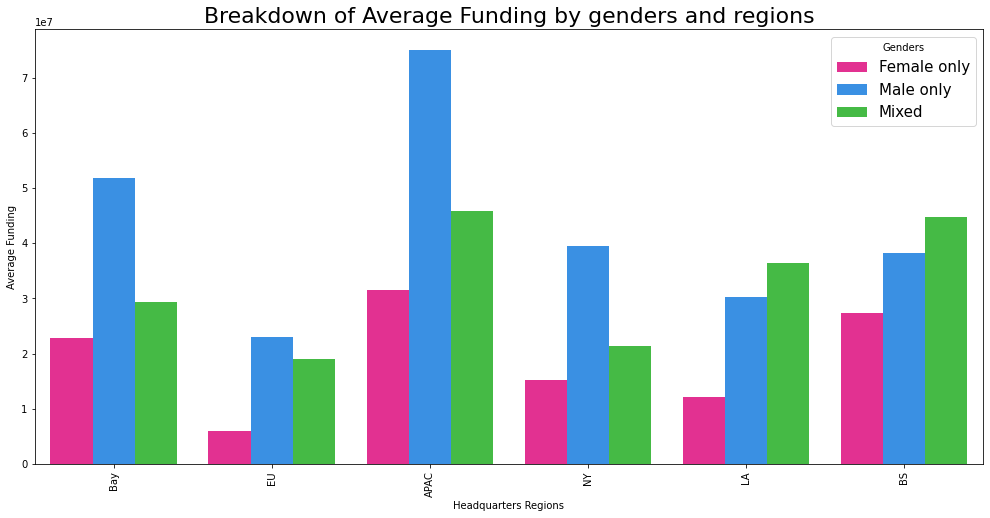

In [36]:
plt.figure(figsize=(17,8))
ax = sns.barplot(x='Headquarters Regions', y='Average Funding', hue='Genders', data=funding, ci = None, order=["Bay", "EU", "APAC", "NY", "LA", "BS"], hue_order=["Female only", "Male only", "Mixed"],palette=["deeppink", "dodgerblue", "limegreen"])
ax.axes.set_title("Breakdown of Average Funding by genders and regions", fontsize=22)
plt.setp(ax.get_xticklabels(), rotation=90, fontsize=10)
plt.legend(fontsize=15, title="Genders");


# fig, axes = plt.subplots(nrows=3, ncols=2,figsize=(13,15))

# rg=avgfunding_Bay.plot.bar(x='Genders', y='Average Funding', rot=0, title = 'Bay', ax=axes[0,0])
# plt.setp(rg.get_xticklabels(), rotation=90)
# rg=avgfunding_APAC.plot.bar(x='Genders', y='Average Funding', rot=0, title = 'APAC', ax=axes[0,1])
# plt.setp(rg.get_xticklabels(), rotation=90)
# rg=avgfunding_EU.plot.bar(x='Genders', y='Average Funding', rot=0, title = 'EU', ax=axes[1,0])
# plt.setp(rg.get_xticklabels(), rotation=90)
# rg=avgfunding_LA.plot.bar(x='Genders', y='Average Funding', rot=0, title = 'LA', ax=axes[1,1])
# plt.setp(rg.get_xticklabels(), rotation=90)
# rg=avgfunding_NY.plot.bar(x='Genders', y='Average Funding', rot=0, title = 'NY', ax=axes[2,0])
# plt.setp(rg.get_xticklabels(), rotation=90)
# rg=avgfunding_BO.plot.bar(x='Genders', y='Average Funding', rot=0, title = 'BO', ax=axes[2,1])
# plt.setp(rg.get_xticklabels(), rotation=90)


# fig.tight_layout()

/home/bossou/.local/lib/python3.6/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


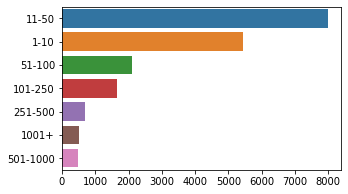

In [37]:
new_df_2 = new_df.dropna()
new_df_2.loc[new_df['Number of Employees'].str.contains('1001-5000|5001-10000|10001+', case=False,na=False), 'Number of Employees'] = '1001+'
categories_counts= new_df_2['Number of Employees'].value_counts()
plt.figure(figsize=(5,3))
sns.barplot(y=categories_counts.index, x=categories_counts.values)

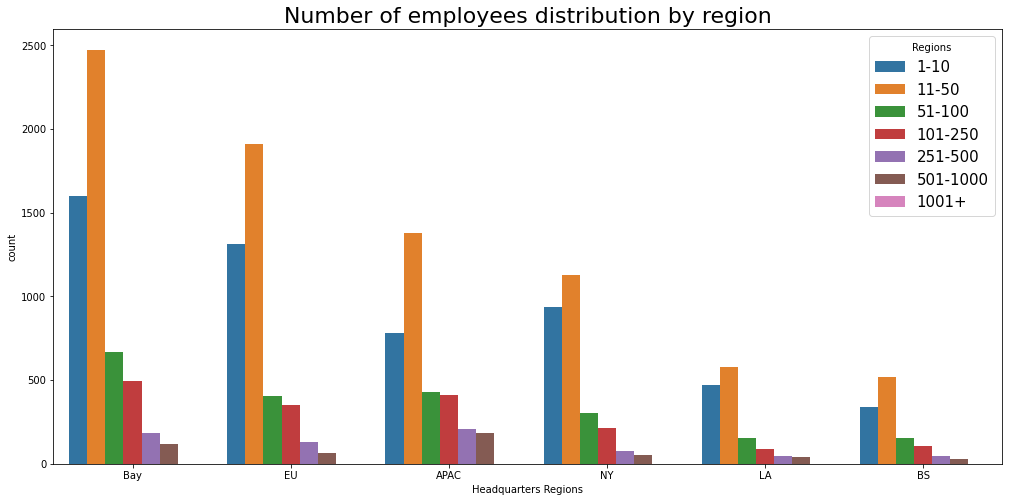

In [38]:
plt.figure(figsize=(17,8))
ax = sns.countplot(x='Headquarters Regions', hue='Number of Employees', data=new_df, order=["Bay", "EU", "APAC", "NY", "LA", "BS"], hue_order=["1-10", "11-50", "51-100", "101-250","251-500","501-1000", "1001+"])
ax.axes.set_title("Number of employees distribution by region", fontsize=22)
plt.setp(ax.get_xticklabels(), rotation=0, fontsize=10)
plt.legend(fontsize=15, title="Regions");



# fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(20,13))

# categories_counts= data_EU['Number of Employees'].value_counts().nlargest(5)
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[0,0])
# axes[0,0].set_title('EU')

# categories_counts= data_Bay['Number of Employees'].value_counts().nlargest(5)
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[0,1])
# axes[0,1].set_title('Bay')

# categories_counts= data_APAC['Number of Employees'].value_counts().nlargest(5)
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[0,2])
# axes[0,2].set_title('APAC')

# categories_counts= data_LA['Number of Employees'].value_counts().nlargest(5)
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[1,0])
# axes[1,0].set_title('LA')

# categories_counts= data_NY['Number of Employees'].value_counts().nlargest(5)
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[1,1])
# axes[1,1].set_title('NY')

# categories_counts= data_BO['Number of Employees'].value_counts().nlargest(5)
# sns.barplot(y=categories_counts.index, x=categories_counts.values, ax=axes[1,2])
# axes[1,2].set_title('BS')